## RSI 전략
- 상대 강도 지수 : 과매도 과매수 상태 지표
- RSI = 100 - (100 / (1 + (평균 상승폭 / 평균 하락폭)))
- 대략 14일 
- 날짜 변경 하거나 해당 일에 시간별로 나눈 것을 넣어도 됨.
- 사용 범위 
    + RSI > 70 : 과매수 상태 
    + RSI < 30 : 과매도 상태 

In [60]:
import pandas as pd

In [61]:
from pykrx import stock
stock_df = stock.get_market_ohlcv_by_date('20000101','20191231','000660') # sk 하이닉스
stock_df_close = stock_df[['종가']]
stock_df_close.head()

,종가
날짜,
2000-01-04,505462
2000-01-05,453444
2000-01-06,429888
2000-01-07,425962
2000-01-10,422037


In [62]:
stock_df_close.describe()

,종가
count,4936.000000
mean,49434.978728
std,75936.456567
min,2650.000000
25%,21137.500000
50%,29450.000000
75%,47200.000000
max,543740.000000


In [63]:
# 전날과 비교
stock_df_close['변화량'] = stock_df_close['종가'] - stock_df_close['종가'].shift(1)
stock_df_close.head()

/tmp/ipykernel_24053/632026374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df_close['변화량'] = stock_df_close['종가'] - stock_df_close['종가'].shift(1)


,종가,변화량
날짜,,
2000-01-04,505462,NaN
2000-01-05,453444,-52018.0
2000-01-06,429888,-23556.0
2000-01-07,425962,-3926.0
2000-01-10,422037,-3925.0


In [64]:
# 음수면 하락, 양수면 상승
condition_up = stock_df_close['변화량'] >= 0 
condition_down = stock_df_close['변화량'] < 0 
condition_down.head() 


날짜
2000-01-04    False
2000-01-05     True
2000-01-06     True
2000-01-07     True
2000-01-10     True
Name: 변화량, dtype: bool

In [65]:
stock_df_close.loc[condition_up, '상승폭'] = stock_df_close['변화량']
stock_df_close.loc[condition_down, '하락폭'] = -stock_df_close['변화량'] # 음수 제거 해야함
stock_df_close.head()

/tmp/ipykernel_24053/2070902840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df_close.loc[condition_up, '상승폭'] = stock_df_close['변화량']
/tmp/ipykernel_24053/2070902840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df_close.loc[condition_down, '하락폭'] = -stock_df_close['변화량']


,종가,변화량,상승폭,하락폭
날짜,,,,
2000-01-04,505462,NaN,NaN,NaN
2000-01-05,453444,-52018.0,NaN,52018.0
2000-01-06,429888,-23556.0,NaN,23556.0
2000-01-07,425962,-3926.0,NaN,3926.0
2000-01-10,422037,-3925.0,NaN,3925.0


In [66]:
stock_df_close = stock_df_close.fillna(0)
stock_df_close.head()

,종가,변화량,상승폭,하락폭
날짜,,,,
2000-01-04,505462,0.0,0.0,0.0
2000-01-05,453444,-52018.0,0.0,52018.0
2000-01-06,429888,-23556.0,0.0,23556.0
2000-01-07,425962,-3926.0,0.0,3926.0
2000-01-10,422037,-3925.0,0.0,3925.0


### 14일 기간에 대한 RSI 구하기 


In [67]:
stock_df_close['AU'] = stock_df_close['상승폭'].rolling(window=14).mean()
stock_df_close['DU'] = stock_df_close['하락폭'].rolling(window=14).mean()
stock_df_close[13:20]

,종가,변화량,상승폭,하락폭,AU,DU
날짜,,,,,,
2000-01-21,522148,-7852.0,0.0,7852.0,9394.214286,8202.357143
2000-01-24,530000,7852.0,7852.0,0.0,9955.071429,8202.357143
2000-01-25,508407,-21593.0,0.0,21593.0,9955.071429,6029.142857
2000-01-26,519203,10796.0,10796.0,0.0,10726.214286,4346.571429
2000-01-27,510370,-8833.0,0.0,8833.0,10726.214286,4697.071429
2000-01-28,543740,33370.0,33370.0,0.0,13109.785714,4416.714286
2000-01-31,518222,-25518.0,0.0,25518.0,11988.142857,6239.428571


In [68]:
# RSI = 100 - (100 / (1 + (평균 상승폭 / 평균 하락폭)))
stock_df_close['RSI'] = (stock_df_close['AU'] / (stock_df_close['AU'] + stock_df_close['DU'])) * 100 
stock_df_close[13:20]

,종가,변화량,상승폭,하락폭,AU,DU,RSI
날짜,,,,,,,
2000-01-21,522148,-7852.0,0.0,7852.0,9394.214286,8202.357143,53.386618
2000-01-24,530000,7852.0,7852.0,0.0,9955.071429,8202.357143,54.826439
2000-01-25,508407,-21593.0,0.0,21593.0,9955.071429,6029.142857,62.280643
2000-01-26,519203,10796.0,10796.0,0.0,10726.214286,4346.571429,71.162786
2000-01-27,510370,-8833.0,0.0,8833.0,10726.214286,4697.071429,69.545585
2000-01-28,543740,33370.0,33370.0,0.0,13109.785714,4416.714286,74.799793
2000-01-31,518222,-25518.0,0.0,25518.0,11988.142857,6239.428571,65.769282


In [69]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

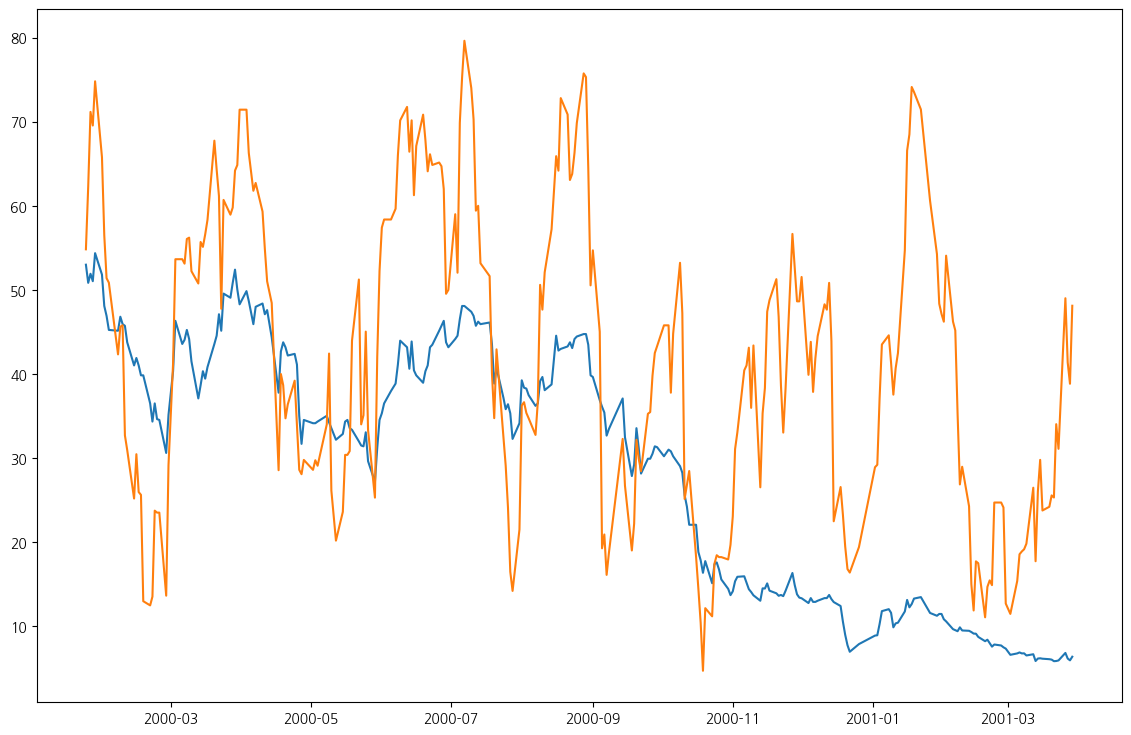

In [82]:
plt.figure(figsize=(14,9), dpi=100) # 
plt.plot(stock_df_close['종가'][14:300]/10000)
plt.plot(stock_df_close['RSI'][14:300])
plt.show()